## imports

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 
import sqlite3

## analyze only the users and not the admins

In [23]:
db = sqlite3.connect('../data/checking-logs.sqlite.sqlite')


In [24]:
query = '''
SELECT uid, timestamp FROM checker
WHERE uid LIKE 'user_%'
'''
commits = pd.io.sql.read_sql(query, db, parse_dates=['timestamp'])
commits.head()

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370


In [25]:
commits['date'] = commits['timestamp'].dt.floor('d')
commits['hour'] = commits['timestamp'].dt.hour
commits.head()

,uid,timestamp,date,hour
0,user_4,2020-04-17 05:19:02.744528,2020-04-17,5
1,user_4,2020-04-17 05:22:35.249331,2020-04-17,5
2,user_4,2020-04-17 05:22:45.549397,2020-04-17,5
3,user_4,2020-04-17 05:34:14.691200,2020-04-17,5
4,user_4,2020-04-17 05:34:24.422370,2020-04-17,5


In [26]:
working_day = commits.loc[commits['date'].dt.dayofweek < 5]['hour']
weekend = commits.loc[commits['date'].dt.dayofweek >= 5]['hour']
working_day = working_day.reset_index(drop=True)
weekend = weekend.reset_index(drop=True)


In [27]:
working_day.head()

0    5
1    5
2    5
3    5
4    5
Name: hour, dtype: int64

In [28]:
weekend.head()

0     7
1    13
2    13
3    13
4    13
Name: hour, dtype: int64

## figsize is the same, use  a level of transparency for the histogram in front equal to 0.7

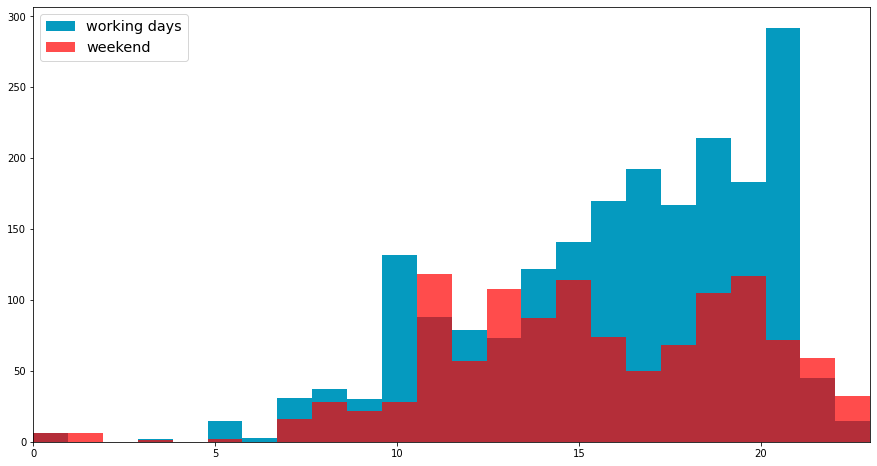

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(working_day, bins=24, label='working days', color='#059ABF')
ax.hist(weekend, bins=24, label='weekend', color='red', alpha=0.7)
ax.set_xlim(0, 23)
ax.legend(loc='upper left', fontsize='x-large')
plt.show()

## Are there hours when the total number of commits was higher on weekends than on working days?

In [30]:
df_working_day = working_day.value_counts()
df_working_day = df_working_day.sort_index()
df_working_day = df_working_day.rename('working_day')
df_working_day = df_working_day.to_frame()
df_working_day.head()


,working_day
0,6
3,2
5,15
6,3
7,31


In [31]:
df_weekend = weekend.value_counts()
df_weekend = df_weekend.sort_index()
df_weekend = df_weekend.rename('weekend')
df_weekend = df_weekend.to_frame()
df_weekend.head()

,weekend
0,6
1,6
3,1
5,2
7,16


In [32]:
df = df_working_day.join(df_weekend, how="inner")
df = df.rename_axis("hour")
df.head()

,working_day,weekend
hour,,
0,6,6
3,2,1
5,15,2
7,31,16
8,37,28


In [33]:
df.loc[df['working_day'] < df['weekend']]

,working_day,weekend
hour,,
11,88,118
13,73,108
22,45,59
23,15,32


hours - 11,13,22,23

In [ ]:
db.close()